## Neural network example


In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate training data
X = np.random.rand(n,p)-0.5
Y1 = np.sign(np.sum(X**2,1)-.1).reshape((-1, 1))/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))

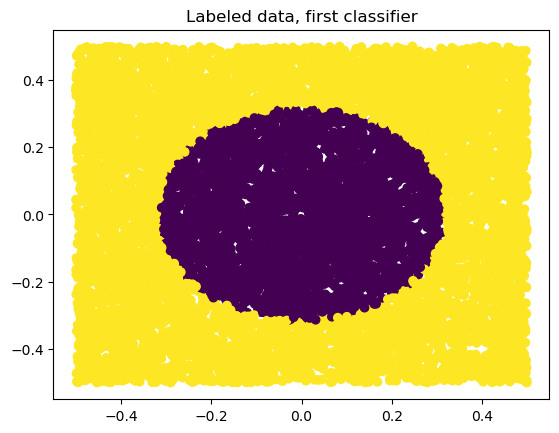

In [2]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classifier')
plt.show()

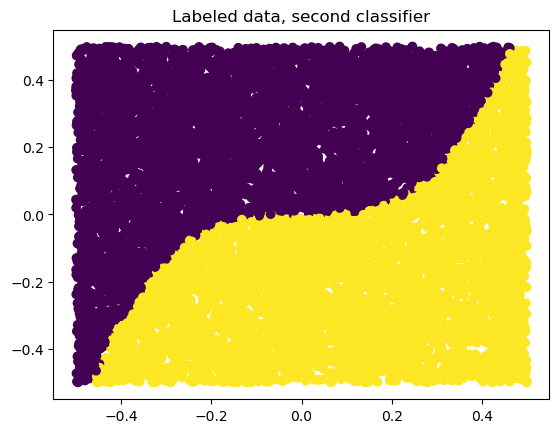

In [3]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classifier')
plt.show()

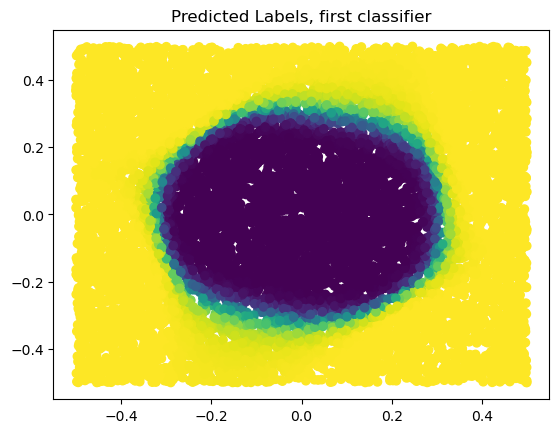

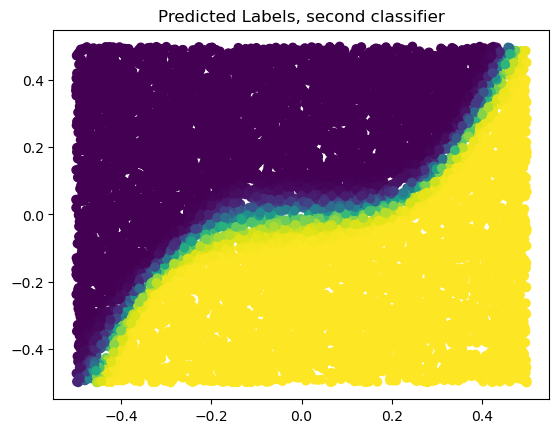

Errors, first classifier: 108.0
Errors, second classifier: 39.0


In [26]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] # number of classification problems
M = 10 # number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 # step size
L = 100 # number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))
        
for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate
        H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
        Yhat = logsig(H@V)
         # Backpropagate
        delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
        Vnew = V-alpha*H.T@delta
        gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
        Wnew = W - alpha*Xb[[i],:].T@gamma
        V = Vnew
        W = Wnew
    #print('epoch: ', epoch)
    
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(H@V)

plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classifier')
plt.show()

plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classifier')
plt.show()

err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
print('Errors, first classifier:', err_c1)

err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
print('Errors, second classifier:', err_c2)